## ProTrump net

In [1]:
import csv
import networkx as nx
import collections

#G = nx.Graph()
G = nx.DiGraph() 

In [2]:
# Add Nodes Persone

# all_noemploy.csv

protectFromDublicat = list()
with open('all_noemploy.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # add nodes
    for row in reader:
        if row['person'] not in protectFromDublicat:
            protectFromDublicat.append(row['person'])
            
            G.add_node(row['id'],
                person = row['person'],
                position_current = row['position_current'],
                source = row['source'],
                date_of_appointment = row['date_of_appointment'],
                date_of_birth = row['date_of_birth'],
                age = row['age'],
                birthplace = row['birthplace'],
                sex = row['sex'],
                bachelors = row['bachelors'],
                masters = row['masters'],
                doctorate = row['doctorate'],
                law = row['law'],
                law_conservative_score = row['law_conservative_score'],
                law_rank = row['law_rank'],
                barr_appointment = row['barr_appointment'],
                political_affiliation = row['political_affiliation'],
                # for edges ... Pro Trump       
                connection_trump = row['connection_trump'],
                connection_trumpally = row['connection_trumpally'],
                connection_conservativeagenda = row['connection_conservativeagenda'],
                # for edges ...        
                connection_careerprofessional = row['connection_careerprofessional'],
                connection_other = row['connection_other'],
                american_center_for_law_and_justice = row['american_center_for_law_and_justice'],
                christian_legal_society_bar_association = row['christian_legal_society_bar_association'],
                federalist_society = row['federalist_society'],
                heritage_foundation = row['heritage_foundation'],
                national_rifle_association_tie = row['national_rifle_association_tie'],
                republican_national_lawyers_association_tie = row['republican_national_lawyers_association_tie']
                      )
           
        

In [3]:
# nodes pro trump
ProTrumpList = ['connection_trump',
                'connection_trumpally',
                'connection_conservativeagenda']

id = 500
for node in ProTrumpList:
    G.add_node(id,nameTrump = node)
    id +=1

# add nodes organisations 

In [4]:
for node in G.nodes.data():
    if int(node[0]) >= 500:
        print(node)

(500, {'nameTrump': 'connection_trump'})
(501, {'nameTrump': 'connection_trumpally'})
(502, {'nameTrump': 'connection_conservativeagenda'})


In [5]:
# add color law rank
for node in G.nodes.data():
    if int(node[0]) < 500 and node[1]['law_rank'] != 'NA': 
        if int(node[1]['law_rank']) in range(0,51):
            G.nodes[node[0]]['color_law_rank'] = 'green'
        if int(node[1]['law_rank']) in range(51,101):
            G.nodes[node[0]]['color_law_rank'] = 'yellow'
        if int(node[1]['law_rank']) in range(101,201):
            G.nodes[node[0]]['color_law_rank'] = 'red'


In [6]:
# add short NAME to DOJ and prosecutor
for node in G.nodes.data():
    if int(node[0]) < 500: 
        if node[1]['source'] == 'prosecutor':
            G.nodes[node[0]]['short_source'] = 'P'
        if node[1]['source'] == 'justicedept':
            G.nodes[node[0]]['short_source'] = 'J'


In [7]:
#add edges to Pro trump 
for node in G.nodes.data():
    if int(node[0]) < 500: 
        #print(node[0],node[1]['person'],node[1]['connection_trump'])
        if node[1]['connection_trump'] == '1':
            G.add_edge(node[0],500)
        if node[1]['connection_trumpally'] == '1':
            G.add_edge(node[0],501)
        if node[1]['connection_conservativeagenda'] == '1':
            G.add_edge(node[0],502)

In [8]:
#Analise for in_degree 
for node in G.nodes.data():
    G.nodes[node[0]]['predecessors'] = len(list(G.predecessors(node[0])))

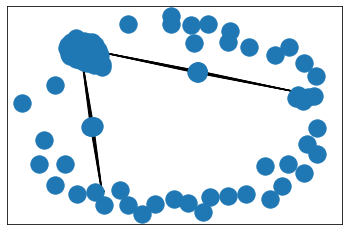

In [9]:
#check net
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [10]:
nx.write_gexf(G, "ProTrump_net.gexf")